# Sui_Wenyu_HW2_report

In [1]:
# import packages
import pandas as pd
import numpy as np
import scipy.sparse
import scipy.sparse.linalg as ll
import math
from IPython.display import display
import matplotlib.pyplot as plt
import scipy.io as sio
from sklearn.metrics import pairwise_distances
from scipy.sparse.csgraph import shortest_path
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image
import os

import functions

## 1. Conceptual questions

### 1.1

According to the definition of principle components, $v$ is a direction along which the variance of the data is maximized. If written in formula, <br> <br>
$v = arg \space max_{w: ||w||<=1} \space \frac{1}{m} \sum_{i=1}^m(w^Tx^i - w^T\mu)^2$ <br>
$\space \space \space=  arg \space max_{w: ||w||<=1} \space \frac{1}{m} \sum_{i=1}^m(w^T(x^i - \mu))^2$  <br>
$\space \space \space=  arg \space max_{w: ||w||<=1} \space \frac{1}{m} \sum_{i=1}^m \space w^T(x^i - \mu)(x^i - \mu)^Tw$  <br>
$\space \space \space=  arg \space max_{w: ||w||<=1} \space w^T(\frac{1}{m} \sum_{i=1}^m \space (x^i - \mu)(x^i - \mu)^T)w$  <br><br>
where $\frac{1}{m} \sum_{i=1}^m \space (x^i - \mu)(x^i - \mu)^T$ is the covariance matrix of the matrix $\{x^1, x^2, x^3 ... x^m\}$ and $ \mu = \frac{1}{m}\sum_{i=1}^mx^i$. <br> <br>
If we write the covariance matrix as $C$, then we can get <br><br>
$v = arg \space max_{w: ||w||<=1} \space w^TCw$ <br><br>

If we define $f(w) =  w^TCw$ and $g(w) = 1 - ||w||$, we know the constraint of $f(w)$ is $g(w) >= 0$. <br>
Therefore, we can form Lagrangian function of the optimization problem <br>
*(reference: https://en.wikipedia.org/wiki/Lagrange_multiplier)*<br><br>
$L(w, \lambda) = f(w) + \lambda g(w)$<br>
$\space \space \space \space \space \space\space \space \space \space \space \space
= w^TCw + \lambda(1 - ||w||)$ <br><br>
If $w$ is a maximum of the original optimization problem, then there exists a $\lambda$, where $(w, \lambda)$ is a stationary point of $L(w, \lambda)$. This implies that all partial derivatives of $L(w, \lambda)$ equal to zero. If written in formula,  $\frac{\partial L(w, \lambda)}{\partial w}=0$. <br>
Since  $\frac{\partial L(w, \lambda)}{\partial w}= 2Cw - 2\lambda w$, we can know that $2Cw - 2\lambda w = 0$. Therefore, $Cw= \lambda w$, so $w$ should be an eigenvector of $C$ and $\lambda$ is an eigenvector of $C$.

Then we can get <br>
$v = arg \space max_{w: ||w||<=1} \space w^TCw $ <br>
$\space \space \space= arg \space max_{w: ||w||<=1} \lambda w^Tw $ <br>
$\space \space \space = arg \space max_{w: ||w||<=1} \lambda ||w||^2$ <br><br>

Therefore, to find $v$, we need to find a eigenvector $w$, of $C$. It should satisfy $||w|| =1$ and $\lambda$ is maximized. In other words, $w$ is the eigenvestor of $C$ with the largest eigenvalue. To conclude, the direction of $v$ should corresponds to the largest eigenvector of the sample covariance matrix.

### 1.2

The direction of second largest principle component should correspond to the eigenvector with the second larget eigenvalue of the sample covariance matrix. 

### 1.3

The probability density function of Gaussian distribution is $f(x) = \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{1}{2}(\frac{x - \mu}{\sigma})^2}$    <br>
*(reference: https://en.wikipedia.org/wiki/Normal_distribution)* <br>
    
Therefore, the MLE of $\mu$ and $\sigma$ should maximize: <br> <br>
$L(\mu, \sigma) = \prod_{i=1}^m f(x^i)$ <br>
$\space \space \space \space \space \space \space \space \space \space \space \space 
= \prod_{i=1}^m \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{1}{2}(\frac{x - \mu}{\sigma})^2}$ <bR>

where $m$ represents the sample size of the dataset. <br> <br>
We can get  <br> <br>
$ln(L(\mu, \sigma)) $ <br>
$= ln(\prod_{i=1}^m \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{1}{2}(\frac{x - \mu}{\sigma})^2} )$ <br>
$= ln(\frac{1}{\sigma \sqrt{2 \pi}} \prod_{i=1}^m e^{-\frac{1}{2}(\frac{x - \mu}{\sigma})^2})$ <br>
$= ln(\frac{1}{\sigma \sqrt{2 \pi}}) + ln(\prod_{i=1}^m e^{-\frac{1}{2}(\frac{x - \mu}{\sigma})^2}))$ <br>
$= - \frac{m}{2}ln(2 \pi) - \frac{m}{2}ln(\sigma^2)-\frac{1}{2\sigma^2}\sum_{i=1}^m(x^i - \mu)^2$ <br>
    
Since $L(\mu, \sigma)$ is maximized, $ln(L(\mu, \sigma))$ should also be maximized. <br> <br>
Thus $\frac{\partial ln(L(\mu, \sigma))}{\partial \mu} = \frac{1}{\sigma^2}\sum_{i=1}^m(x^i - \hat{\mu}) \equiv 0$ <br> <br>
We can get $\hat{\mu} = \frac{\sum_{i=1}^m x^i}{m} $ <br> <br>
    
Similarly, since  $\frac{\partial ln(L(\mu, \sigma))}{\partial \sigma^2} = -\frac{m}{2\sigma^2} + \frac{1}{2\sigma^4} \sum_{i=1}^m(x^i - \hat{\mu})^2 \equiv 0$ <br><br>
Thus $\hat{\sigma^2} = \frac{\sum_{i=1}^m(x^i - \hat{\mu})^2}{m}$

### 1.4

The nature of ISOMAP is to find a low-dimentional representation of high-dimentional data, while preserving the "walking-through" distance over the data cloud. It involved three key ideas:

1. Find neighbors of each data point within a distance threshold $\epsilon$ and create the adjacency matrix $A$ which records neighbor Euclidean distance. (This can also be done by finding the $K$ nearest neighbors of each data point.)
2. Find shortest path distance between each pair of data points based on $A$. Create the shortest distance matrix $D$, where $D_{i,j}$ represents the shortest path distance between data points $i$ and $j$.
3. Find a low-dimensional representation of $D$. The new matrix should preserve the path distance between each pair of data points from $D$.


### 1.5

PCA is sensitive to outliers. If there are outliers in the dataset, the other data points which are not outliers will appear to be "closer" to each other, comparing to when the outliers are removed from the data.

Here, we will use the dataset for question 2 as an example. We will use PCA and show the data points on a 2-dimentional scatter plot. The first plot below shows the dataset before outliers are added. The second plot show the dataset after the outliers #1 and #2 are added.

As we can observe, after the two outliers are added, the other data points are mostly distributed at the center of the plot. They are also much closer to each other comparing to the first plot. 

PCA 1 - Food Consumption data without outliers


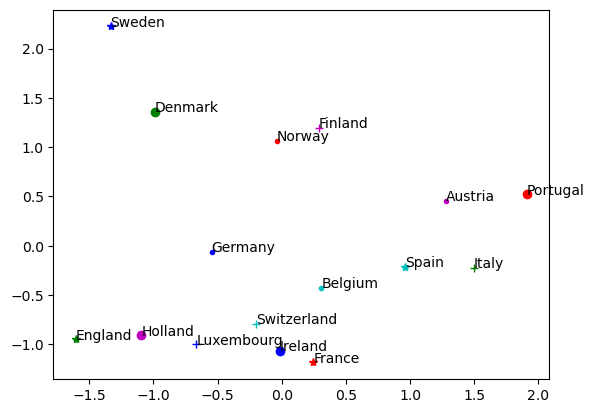

PCA 2 - Food Consumption data with outliers


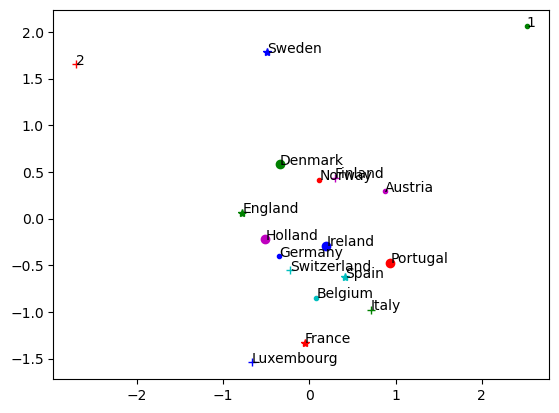

In [2]:
# read food-consumptioon.csv
df1 = pd.read_csv('data/food-consumption.csv')

# create 2 outliers
outlier = pd.DataFrame({'Country': ['1', '2'],
                        'Real coffee':[0,90],
                        'Instant coffee':[0, 90],
                        'Tea':[0, 90],
                        'Sweetener':[0,90],
                        'Biscuits':[0,90],
                        'Powder soup':[0,90],
                        'Tin soup':[0,90],
                        'Potatoes': [0,90],
                        'Frozen fish':[0,90],
                        'Frozen veggies':[0,90],
                        'Apples':[0,90],
                        'Oranges':[0,90],
                        'Tinned fruit':[0,90],
                        'Jam':[0,90],
                        'Garlic':[0,90],
                        'Butter':[0,90],
                        'Margarine':[0,90],
                        'Olive oil':[0,90],
                        'Yoghurt':[0,90],
                        'Crisp bread':[0,90]})
df2 = pd.concat([df1, outlier])
df1 = df1.set_index(['Country'])
df2 = df2.set_index(['Country'])


# show data without outliers
countries1 = np.array(df1.index)
food1 = np.array(df1.columns)

x = np.array(df1)
# perform PCA
dim1, dim2 = functions.pca_food_consumption(x)
print("PCA 1 - Food Consumption data without outliers")
# visualize the result
functions.visual_food_consumption(dim1, dim2, countries1)


# show data witt outliers
countries2 = np.array(df2.index)
food2 = np.array(df2.columns)

x = np.array(df2)
# perform PCA
dim1, dim2 = functions.pca_food_consumption(x)
print("PCA 2 - Food Consumption data with outliers")
# visualize the result
functions.visual_food_consumption(dim1, dim2, countries2)

## 2. PCA: Food consumption in European countries

### 2.a

The food consumption data from "**food-consumption.csv**" is read into a $16\times20$ numpy array named **x** in the following code chunks. <br>
In this array, each row represents one country (i.e. a data point), and each column represents one type of food (i.e. a "feature").  The values in the array represent the consumption of the food.

Since the consumption of each type of food may at different level, we normalize the data of each feature before PCA is performed. Then we extract the first two principle components for each data point. We use these two principle components as coordinates and put the data points into a two-dimentional scatter plot. The second code chunk in this section prints out the result.

Some interesting patterns can be observed from the scatter plot below:
1. Some countries are near to each other (e.g. France and Ireland). It means that these countries may have similar food consumption structure.
2. Some countries are isolated (e.g. Sweden). It means that these countries may have a food consumption structure far different from other countries.
3. Some countries may have opposite food consumption structures (e.g. England and Portugal), since these countries are in the opposite directions from the origin point $(0,0)$.

In [3]:
# read food-consumptioon.csv
df = pd.read_csv('data/food-consumption.csv')
df = df.set_index(['Country'])

countries = np.array(df.index)
food = np.array(df.columns)

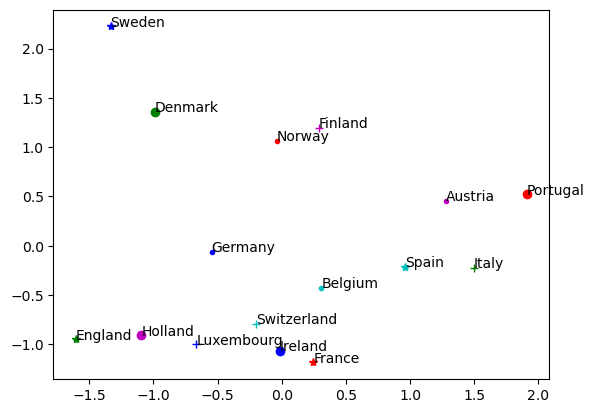

In [4]:
x = np.array(df)
# perform PCA
dim1, dim2 = functions.pca_food_consumption(x)

# visualize the result
functions.visual_food_consumption(dim1, dim2, countries)

### 2.b

In this section, we load the data into a $20\times16$ numpy array named **x2** in the following code chunks. <br>
In this array, each row represents one type of food (i.e. a data point), and each column represents one country (i.e. a "feature").  Then value in the array represents the consumption of the food.

Similar to previous question,  we extract the first two principle components for each data point. We use these two principle components as coordinates and put the data points into a two-dimentional scatter plot.  Here are the patterns we observed:

1. Some foods are isolated (e.g. Olive Oil and Garlic). It means that the groups of countries consuming these types of food are different from the groups of countries consuming any other types of food..
2. Some foods may be consumed by very different groups of countries (e.g. potatos and tea), since these foods are in the opposite directions from the origin point $(0,0)$.
3. Some foods are clustered and near to each other (e.g. apples and oranges). It means that these foods may be consumed by similar groups of countries..

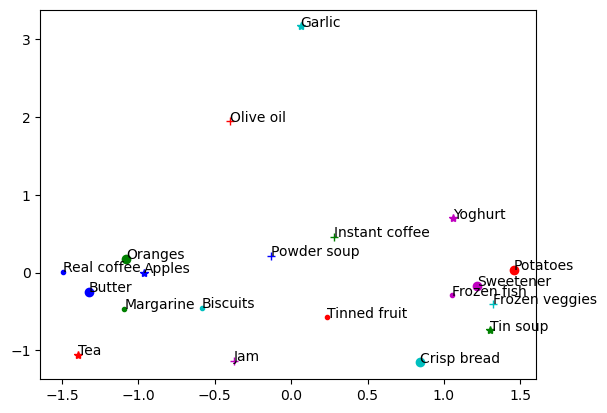

In [5]:
x2 = np.array(df).T

# perform PCA
dim1, dim2 = functions.pca_food_consumption(x2)

# visualize the result
functions.visual_food_consumption(dim1, dim2, food)

## 3. Order of faces using ISOMAP

### 3.a

To construct a adacency matrix, we first need to tune the threshold of $\epsilon$ to make sure the algorithm achieves a reasonable performance. <br>
In the following code chunk, we will tune $\epsilon$ by trial and error. We will try $\epsilon = 10, 11, 12, 13, 14, 15, 16, 17, 18 $. For each $\epsilon$ value, we will implement ISOMAP algorithm, print out the result in a scatter plot, and manually examine the performnace of the algorithm using visuals.

Please notice that in the ISOMAP algorithm, we didn't directly use the eignevectors returned by *np.linalg.eig()*, since this package returns us eigenvectors with opposite signs compared to what we expect. Therefore, we used the vigenvestors return by this package times -1 as our eigenvectors. <br>
*(reference: https://datascience.stackexchange.com/questions/54413/why-does-np-linalg-eig-produce-an-opposite-signed-eigenvector)*

As we can see from the output below, the algorithm achieves the best performance when $\epsilon = 13$. Thererfore, we will implement our Algorithm and generate the adjacency matrix using $\epsilon = 13$. The output is printed under the second doe chunk in this section.

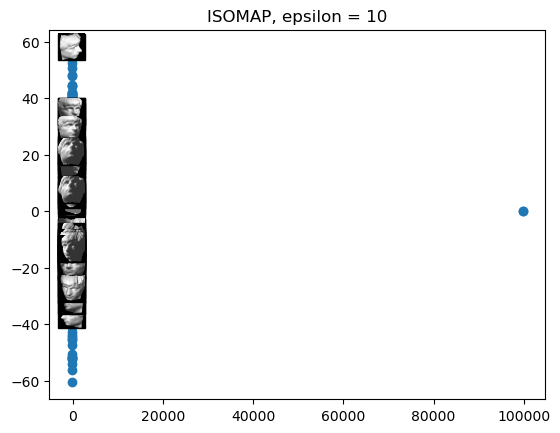

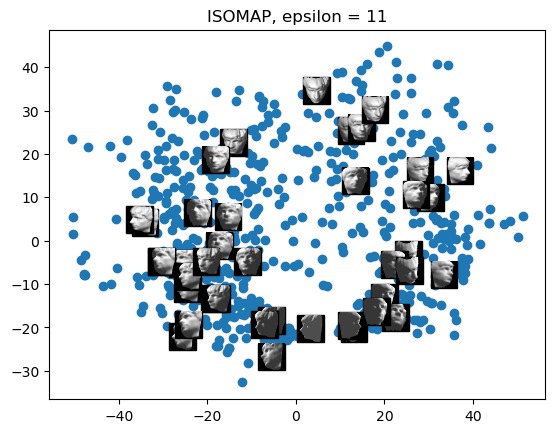

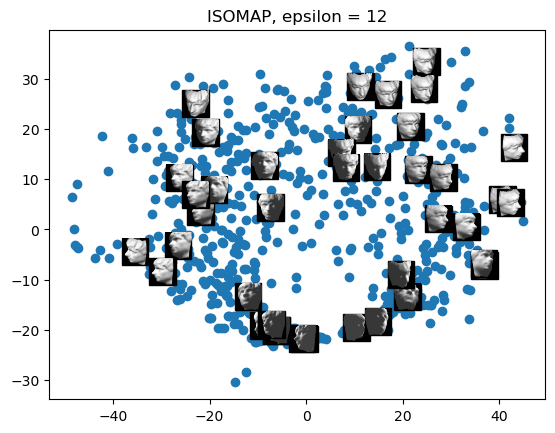

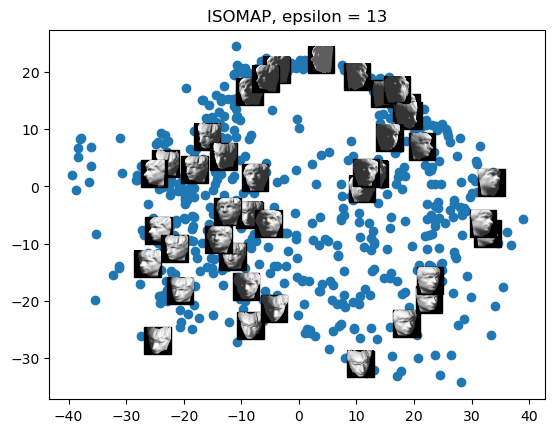

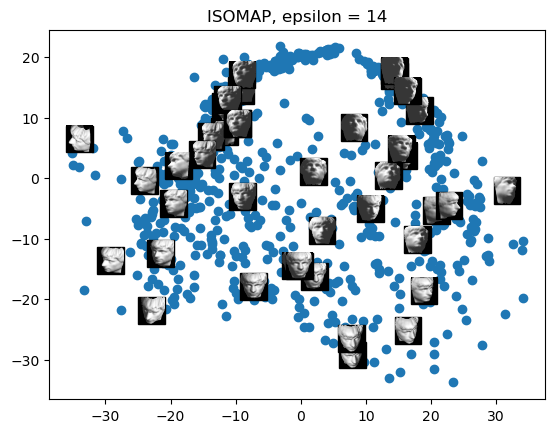

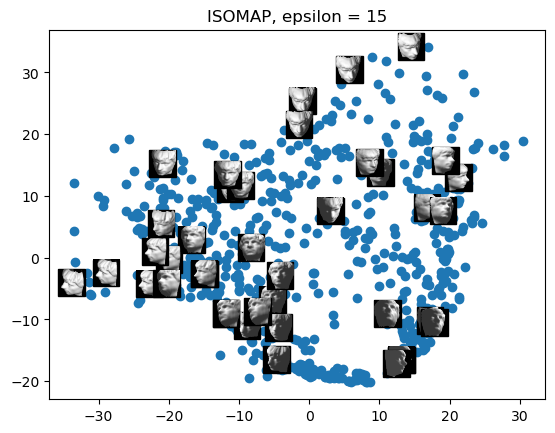

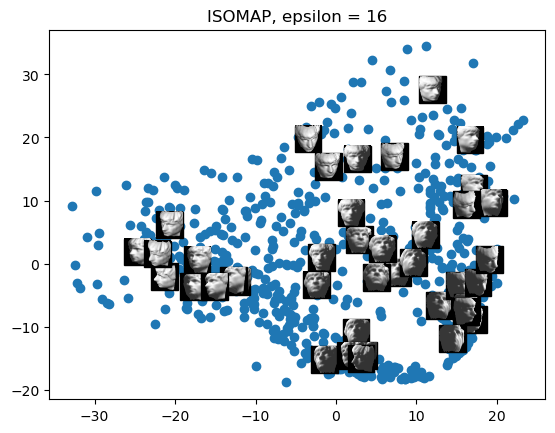

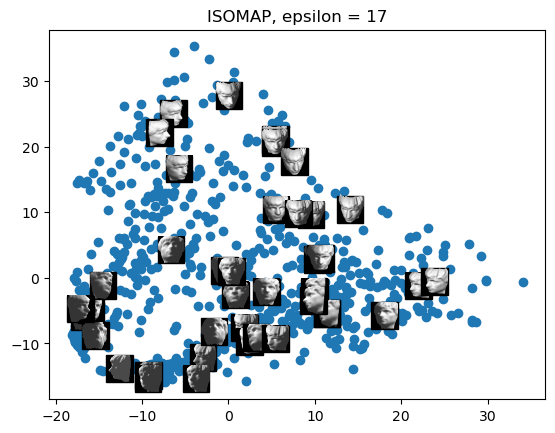

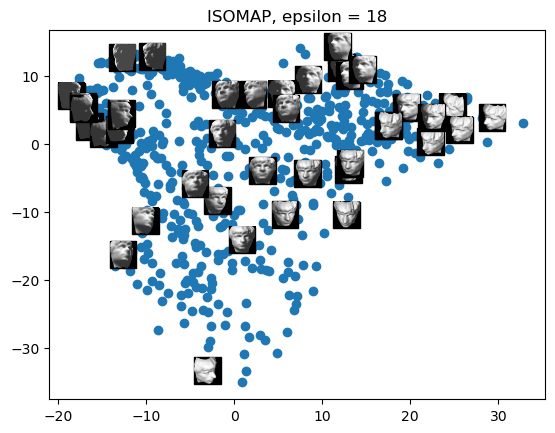

In [6]:
# read data
matfile = sio.loadmat('./data/isomap.mat')
isomap = matfile['images'].T
m= isomap.shape[0]

# calculate Euclidian distance between each pair of data points
A = pairwise_distances(isomap)

# choose epsilon threshold
epsilon =  [10, 11, 12, 13, 14, 15, 16, 17, 18]

for eps in epsilon:

    A1 = functions.isomap_adjacency_matrix_epsilon_threshold(A, eps)
    
    # Implement ISOMAP
    Z = functions.isomap(A, eps)

    plt.scatter(Z[:, 0], Z[:, 1])
    plt.title("ISOMAP, epsilon = " + str(eps))

    # display some randomly selected sample pictures
    select = np.random.randint(m, size = (1, 40)).squeeze()
    ax = plt.subplot(111)
    for i in select:
        image = isomap[i, :].reshape(64, 64).T
        imagebox = OffsetImage(image, zoom=.3, cmap = 'gray')
        xy = (Z[i, 0], Z[i, 1])

        ab = AnnotationBbox(imagebox, xy, pad = 0)
        ax.add_artist(ab)

    plt.draw()
    plt.show()

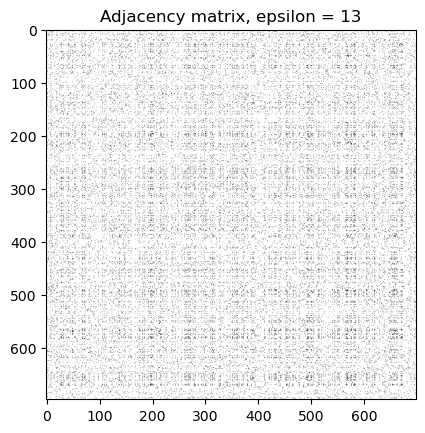

Examples of images
image index: 299


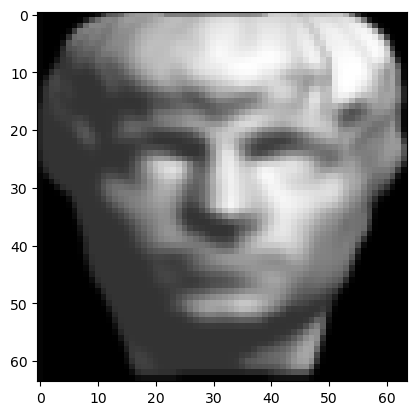

image index: 255


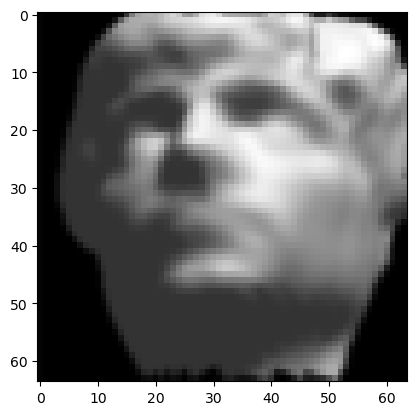

image index: 538


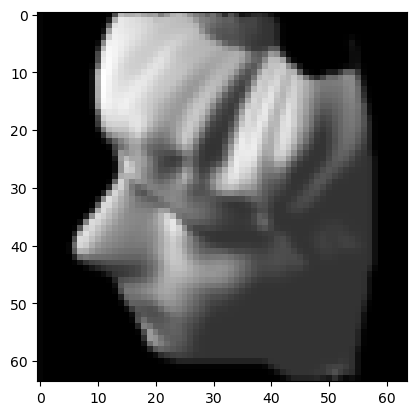

In [7]:
eps = 13
A1 = functions.isomap_adjacency_matrix_epsilon_threshold(A, eps)

# print ad
plt.imshow(A1, plt.cm.binary)
plt.title("Adjacency matrix, epsilon = " + str(eps))
plt.show()

# randomly illustrate a few images
print("Examples of images")
select = np.random.randint(m, size = (1, 3)).squeeze()
for i in select:
    print("image index: " + str(i))
    image = isomap[i, :].reshape(64, 64).T
    plt.imshow(image, plt.cm.gray)
    plt.show()

### 3.b

As discussed in the last section, we implement ISOMAP algorithm using $\epsilon = 13$. The result is printed in the code chunk below. 

This result is pretty similar to the example provided in the paper and the lecture. We can observe that the faces looking at the same directiion are placed near to each other. The faces looking at left are placed on the left; those looking at right are placed on the right; those looking up are at the top; and those looking down are at the bottom. We can also see smooth transaitions in the directions of the faces along the x and y axis in the scatter plot.

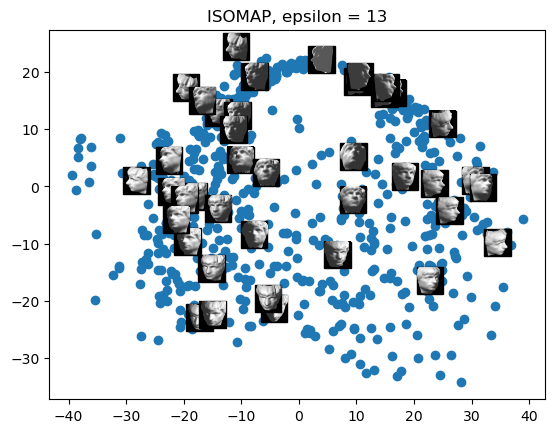

In [8]:
eps = 13
A1 = functions.isomap_adjacency_matrix_epsilon_threshold(A, eps)
    
# Implement ISOMAP
Z = functions.isomap(A, eps)

plt.scatter(Z[:, 0], Z[:, 1])
plt.title("ISOMAP, epsilon = " + str(eps))

# display some randomly selected sample pictures
select = np.random.randint(m, size = (1, 40)).squeeze()
ax = plt.subplot(111)
for i in select:
    image = isomap[i, :].reshape(64, 64).T
    imagebox = OffsetImage(image, zoom=.3, cmap = 'gray')
    xy = (Z[i, 0], Z[i, 1])

    ab = AnnotationBbox(imagebox, xy, pad = 0)
    ax.add_artist(ab)

plt.draw()
plt.show()

### 3.c

The results from PCA are displayed below.<br>
Similar to the results from ISOMAP, we can see that some faces (not all) with similar directions are placed near to each other in the scatter plot. For example, some faces looking at left are placed on the right side of the scatter plot. Some other faces looking at right are placed at the bottom of the scatter plot.

Unlike ISOMAP, PCA failed to put all similar faces near to each other. For example, there are faces looking at left on both left side and right side of the scatter plot. There is also not a smooth transition in the directions of the faces along the x and y axis in the scatter plot.

To conclude, ISOMAP can generate a much more meaningful projection comapring to PCA.

In [9]:
# perform PCA using the code from Question 2
dim1, dim2 = functions.pca_isomap(isomap )

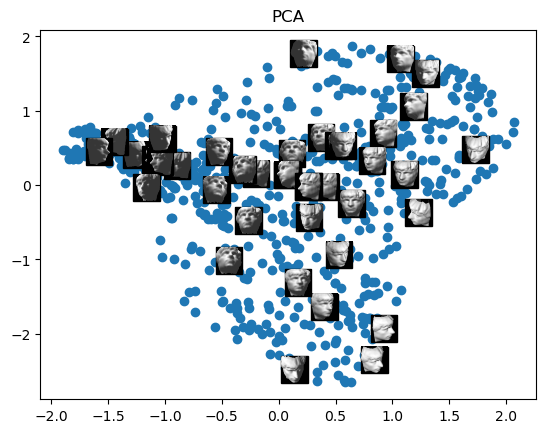

In [10]:
plt.scatter(dim1, dim2)
plt.title("PCA")

# display some randomly selected sample pictures
select = np.random.randint(m, size = (1, 40)).squeeze()
ax = plt.subplot(111)
for i in select:
    image = isomap[i, :].reshape(64, 64).T
    imagebox = OffsetImage(image, zoom=.3, cmap = 'gray')
    xy = (dim1[i], dim2[i])

    ab = AnnotationBbox(imagebox, xy, pad = 0)
    ax.add_artist(ab)

plt.draw()
plt.show()

## 4. Eigenfaces and simple face recognition

### 4.a

The top 6 eigenfaces for each subject are displayed below.
It can be seen that the eigenface with the highest eigenvalue has the most identifiable featureof the subject, and the eigenface with the lowest eigenvalue has the fewest identifiable features of the subject.

Eigenfaces of subject 1
Eigenface 1 of subject 1


C:\Users\WenyuSui\OneDrive - Georgia Institute of Technology\ISYE 6740 Computational data analysis\homework2\Sui_Wenyu_HW2\functions.py:191: RuntimeWarning: invalid value encountered in divide
  S_sqrt = np.identity(K) / np.diag(np.sqrt(S))


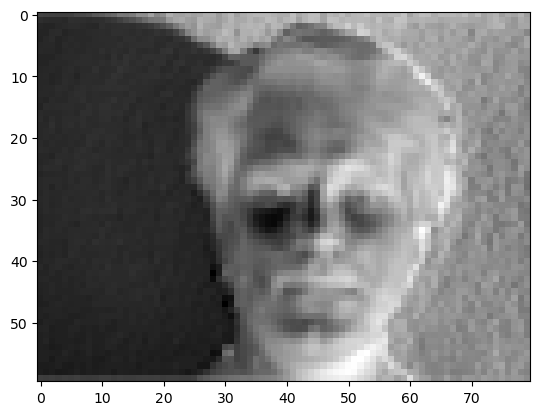

Eigenface 2 of subject 1


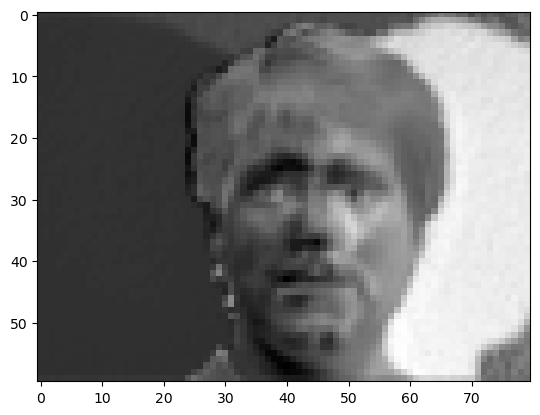

Eigenface 3 of subject 1


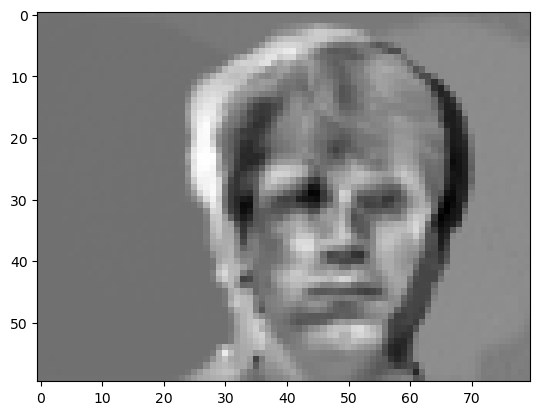

Eigenface 4 of subject 1


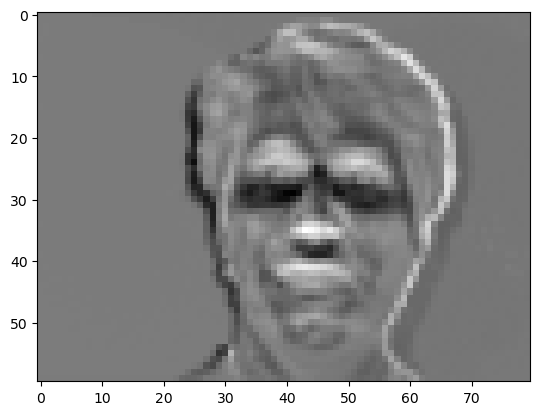

Eigenface 5 of subject 1


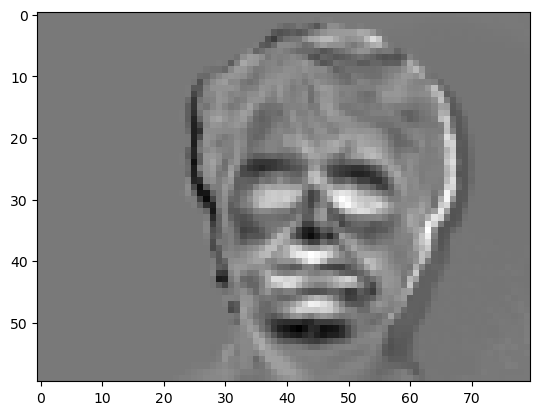

Eigenface 6 of subject 1


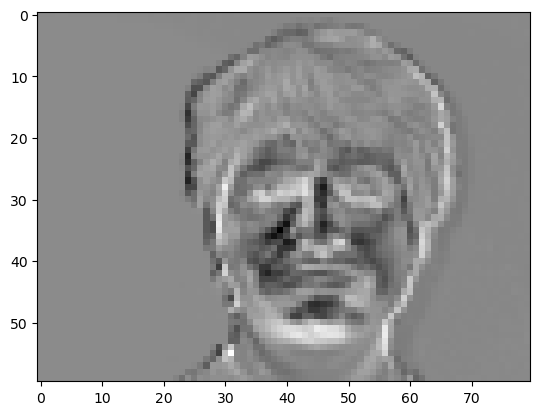

Eigenfaces of subject 2
Eigenface 1 of subject 2


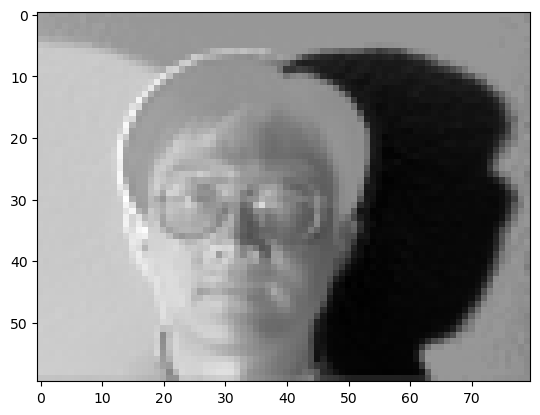

Eigenface 2 of subject 2


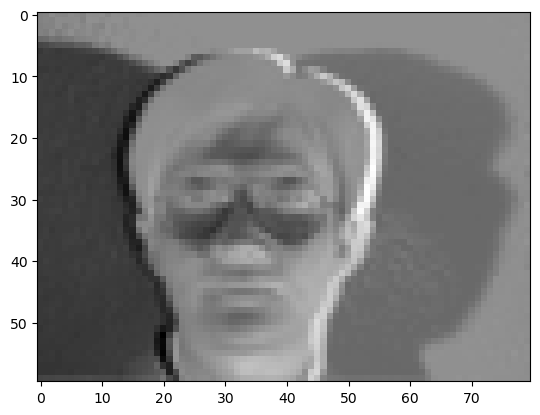

Eigenface 3 of subject 2


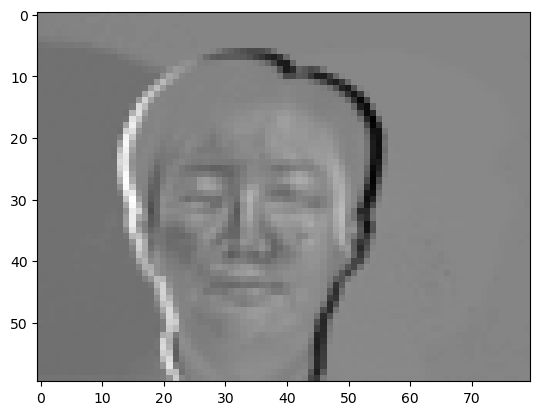

Eigenface 4 of subject 2


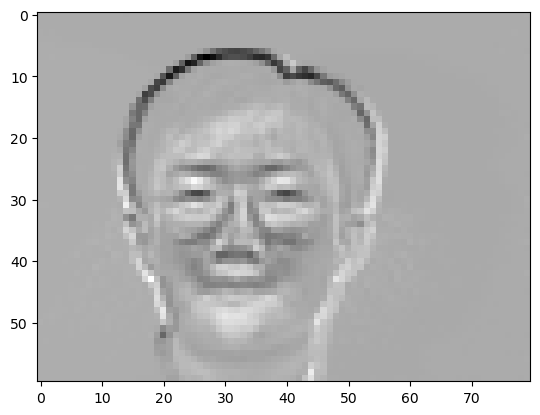

Eigenface 5 of subject 2


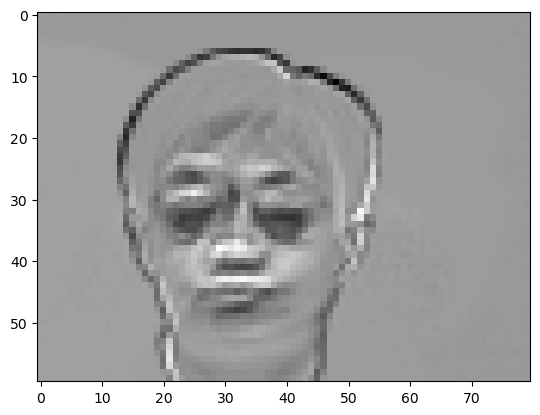

Eigenface 6 of subject 2


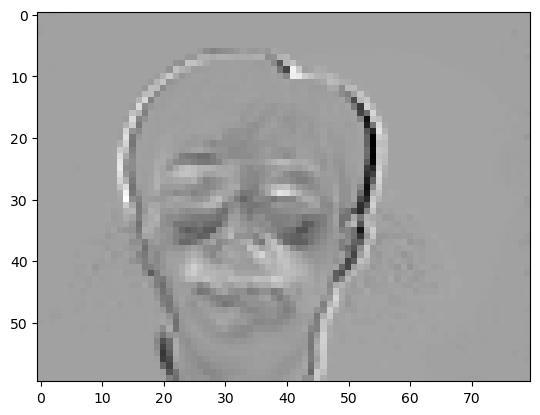

In [11]:
# set up file directories
files = os.listdir("Data/yalefaces")
subject1_files = [file for file in files \
                  if ('subject01' in file) and (file != 'subject01-test.gif')]
subject2_files = [file for file in files \
                  if ('subject02' in file) and (file != 'subject02-test.gif')]

subject_files = [subject1_files, subject2_files]
subject_face_list = []  # a list to store face matrix for each subject
eigenfaces_list = []    # a list to store the top 6 eignenfaces for each subject

for i, subject in enumerate(subject_files):

    # read, downsize and vectorize images
    faces, width, height = functions.create_subject_face_matrix(subject)

    subject_face_list += [faces]

    # implement PCA - create eigenfaces
    Z, eigenfaces = functions.pca_eigenface(faces)
    eigenfaces_list += [eigenfaces]

    # display eigenfaces
    print("Eigenfaces of subject " + str(i + 1))
    for j in range(6):
        print("Eigenface " + str(j + 1) + " of subject " + str(i + 1))
        functions.show_image(width, height, eigenfaces[:, j])

### 4.b

The calculation result for all the four scores $S_{1,1}, S_{1,2}, S_{2,1}, S_{2,2}$ are displyed in the following code chunk.<br>
For each test image $j$, we need to find the eigenface $i$ that generates the lowest $s$ score. <br>
(note: when we calcualte the score, we need to substract the mean value of each subject's face vector from the original test image vector.) <bR>
To be specific, when $ j =1$, $S_{1,1} = 5578082.26$ and $S_{2,1} = 5715238.63$  . Since $S_{1,1}<S_s{2,1}$, test image 1 belongs to subject 1. When $ j =2$, $S_{1,2} = 3901438.44$ and $S_{2,2} = 1860593.90$  . Since $S_{2,2}<S_{1,2}$, test image 2 belongs to subject 2.

In [12]:
# set up test file directories
test = ['subject01-test.gif', 'subject02-test.gif']
# read, downsize and vectorize images
test_faces, test_width, test_height = functions.create_subject_face_matrix(test)

# calculate projection residual of the 2 vectorized test images
S = np.zeros((2,2))

# iterate test faces
for j in range(2):
    test_image  = test_faces[j, :].reshape((test_height * test_width, 1))
    avg_face = np.mean(subject_face_list[j], axis = 0).reshape((height * width, 1))
    # subtract average face values from the test face
    test_image = test_image - avg_face

    # iterate eigenfaces
    for i in range(2):
        eigenfaces = eigenfaces_list[i]
        projected_residual = np.linalg.norm(test_image - eigenfaces.dot(eigenfaces.T).dot(test_image), ord = 'fro')**2
        S[i, j] = projected_residual

print("Projection Residuals Calculation Results:")
result = pd.DataFrame(np.round(S,2)) \
                   .rename(columns =  {0: 1, 1: 2})
result.index = result.index+1
display(result)

Projection Residuals Calculation Results:


,1,2
1,5578082.26,3901438.44
2,5715238.63,1860593.90


### 4.c

 The recognition algorithm above successfully  recognized the subjects in both the two test images. Therefore, it works well <br>
 There are two steps that can possibly improve the performance of the algorithm:
 
 1.  Collection more images of each subject to perform the principle component analysis.
 2. Right now, we used the top 6 eigenfaces for the analysis. We can increase the number of eignefaces used in the algorithm to improve the recognition accuracy.

## 5. To subtract or not to subtract, that is the question

$C = \frac{1}{m} \sum_{i=1}^{m} (x^i - \mu)(x^i - \mu)^T$ <br>
$\space \space \space =  \frac{1}{m} \sum_{i=1}^{m} (x^i - \mu)(x^{iT} - \mu^T)$ <br>
$\space \space \space =  \frac{1}{m} \sum_{i=1}^{m} (x^ix^{iT} - x^i \mu^T - \mu x^{iT} + \mu \mu^T)$ <br>
$\space \space \space =  \frac{1}{m} \sum_{i=1}^{m} x^ix^{iT} - \frac{1}{m} \sum_{i=1}^{m} x^i \mu^T - \frac{1}{m} \sum_{i=1}^{m} \mu x^{iT} + \frac{1}{m} \sum_{i=1}^{m} \mu \mu^T$ <br>
$\space \space \space =  \frac{1}{m} \sum_{i=1}^{m} x^ix^{iT} - \frac{1}{m} (\sum_{i=1}^{m} x^i) \mu^T - \mu \frac{1}{m} \sum_{i=1}^{m} x^{iT} + \frac{1}{m} \sum_{i=1}^{m} \mu \mu^T$ <br>

Since $\tilde{C} = \frac{1}{m} \sum_{i=1}^{m} x^ix^{iT}$, we can get <br>

$C = \tilde{C} - \mu \mu^T - \mu \mu^T + \mu \mu^T = \tilde{C} - \mu \mu^T$ <br><br>

Since $C$ is a different matrix from $\tilde{C}$ and they are not similar to each other, $C$ and $\tilde{C}$ can not have the same largest eigenvalue and eigenvector unless $\mu = 0$.
Therefore $w^1$ doesn't eqaul $\tilde{w^1}$ unless $\mu = 0$.